# Libraries

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plotly import graph_objects as go

# Loading

In [8]:
ba_reviews = pd.read_parquet('../generated/BeerAdvocate/reviews.parquet')
rb_reviews = pd.read_parquet('../generated/RateBeer/reviews.parquet')

# BeerAdvocate Experts

In [10]:
ba_users = ba_reviews.groupby('user_id').agg(num_reviews=('text', 'count'))
print(max(ba_users['num_reviews'])) 
ba_total_reviews = ba_users['num_reviews'].sum()
ba_users['review_proportion_percentage'] = ba_users['num_reviews'] / ba_total_reviews * 100
ba_users = ba_users.sort_values(by= 'num_reviews', ascending= False)

0


In [13]:
ba_users = ba_reviews.groupby('user_id').agg(num_reviews=('text', 'count'))
ba_reviews

beer_name  beer_id  \
index                                  
0                     Régab   142544   
1             Barelegs Brew    19590   
2             Barelegs Brew    19590   
3             Barelegs Brew    19590   
4             Barelegs Brew    19590   
...                     ...      ...   
2589581  Irvington Pale Ale    19141   
2589582          Kölsch Ale    19139   
2589583          Kölsch Ale    19139   
2589584          Kölsch Ale    19139   
2589585       Nut Brown Ale    19140   

                                      brewery_name  brewery_id  \
index                                                            
0        Societe des Brasseries du Gabon (SOBRAGA)       37262   
1             Strangford Lough Brewing Company Ltd       10093   
2             Strangford Lough Brewing Company Ltd       10093   
3             Strangford Lough Brewing Company Ltd       10093   
4             Strangford Lough Brewing Company Ltd       10093   
...                                            ...         ...   
2589581        Summit Station Restaurant & Brewery         885   
2589582        Summit Station Restaurant & Brewery         885   
2589583        Summit Station Restaurant & Brewery         885   
2589584        Summit Station Restaurant & Brewery         885   
2589585        Summit Station Restaurant & Brewery         885   

                           style  abv                date        user_name  \
index                                                                        
0                Euro Pale Lager  4.5 2015-08-20 10:00:00          nmann08   
1               English Pale Ale  4.5 2009-02-20 11:00:00      StJamesGate   
2               English Pale Ale  4.5 2006-03-13 11:00:00          mdagnew   
3               English Pale Ale  4.5 2004-12-01 11:00:00  helloloser12345   
4               English Pale Ale  4.5 2004-08-30 10:00:00       cypressbob   
...                          ...  ...                 ...              ...   
2589581  American Pale Ale (APA)  6.8 2004-11-15 11:00:00           ecoboy   
2589582                   Kölsch  5.0 2006-02-27 11:00:00          jaluria   
2589583                   Kölsch  5.0 2006-02-19 11:00:00        Dithyramb   
2589584                   Kölsch  5.0 2004-08-10 10:00:00       ManekiNeko   
2589585        English Brown Ale  5.3 2006-02-19 11:00:00        Dithyramb   

                       user_id  appearance  aroma  palate  taste  overall  \
index                                                                       
0               nmann08.184925        3.25   2.75    3.25   2.75      3.0   
1           stjamesgate.163714        3.00   3.50    3.50   4.00      3.5   
2                mdagnew.19527        4.00   3.50    3.50   4.00      3.5   
3        helloloser12345.10867        4.00   3.50    4.00   4.00      4.5   
4              cypressbob.3708        4.00   4.00    4.00   4.00      4.0   
...                        ...         ...    ...     ...    ...      ...   
2589581            ecoboy.1641        3.50   3.00    3.50   3.00      3.5   
2589582          jaluria.31362        3.50   3.50    3.50   4.00      4.0   
2589583         dithyramb.4413        3.00   3.00    3.00   2.50      3.0   
2589584        manekineko.2654        3.00   1.50    1.00   1.50      1.5   
2589585         dithyramb.4413        3.00   3.00    3.00   3.00      3.0   

         rating  text  
index                  
0          2.88   NaN  
1          3.67   NaN  
2          3.73   NaN  
3          3.98   NaN  
4          4.00   NaN  
...         ...   ...  
2589581    3.18   NaN  
2589582    3.80   NaN  
2589583    2.80   NaN  
2589584    1.54   NaN  
2589585    3.00   NaN  

[2501214 rows x 16 columns]

In [ ]:
ba_sum_review_proportion_experts = 0
ba_experts_id = []
for index, row in ba_users.iterrows():
    if ba_sum_review_proportion_experts >= 50:
        break
    ba_sum_review_proportion_experts += row['review_proportion_percentage']
    ba_experts_id.append(row.name)
print(f"Number of experts in BeerAdvocate: {len(ba_experts_id)}")
print(f"Users considering as expert participate at {ba_sum_review_proportion_experts: .3f} % of the whole reviews but represent only {len(ba_experts_id) / len(ba_users) * 100: .3f} %")

num_reviews                     0.0
review_proportion_percentage    NaN
Name: zzyzx.174143, dtype: float64
num_reviews                     0.0
review_proportion_percentage    NaN
Name: --dom--.709199, dtype: float64
num_reviews                     0.0
review_proportion_percentage    NaN
Name: --weezl--.789708, dtype: float64
num_reviews                     0.0
review_proportion_percentage    NaN
Name: -blast-tyrant-.1105240, dtype: float64
num_reviews                     0.0
review_proportion_percentage    NaN
Name: -hoptimus_prime-.960108, dtype: float64
num_reviews                     0.0
review_proportion_percentage    NaN
Name: -liam-.930824, dtype: float64
num_reviews                     0.0
review_proportion_percentage    NaN
Name: -mk-.763762, dtype: float64
num_reviews                     0.0
review_proportion_percentage    NaN
Name: -n8.780631, dtype: float64
num_reviews                     0.0
review_proportion_percentage    NaN
Name: -rick.912339, dtype: float64
num_reviews 

**Comment:**

In [5]:
ba_reviews_experts = ba_reviews[ba_reviews['user_id'].isin(ba_experts_id)].copy()
ba_experts_id = pd.DataFrame(ba_experts_id, columns= ['expert_user_id'])
ba_experts_id.to_csv('../generated/ba_experts_id.csv')
ba_reviews_experts.to_parquet('../generated/ba_reviews_experts.parquet')

# RateBeer

In [6]:
rb_users = rb_reviews.groupby('user_id').agg(num_reviews=('text', 'count'))
rb_total_reviews = rb_users['num_reviews'].sum()
rb_users['review_proportion_percentage'] = rb_users['num_reviews'] / rb_total_reviews * 100
rb_users = rb_users.sort_values(by= 'num_reviews', ascending= False)

In [7]:
rb_sum_review_proportion_experts = 0
rb_experts_id = []
for index, row in rb_users.iterrows():
    if rb_sum_review_proportion_experts >= 50:
        break
    rb_sum_review_proportion_experts += row['review_proportion_percentage']
    rb_experts_id.append(row.name)
print(f"Number of experts in BeerAdvocate: {len(rb_experts_id)}")
print(f"Users considering as expert participate at {rb_sum_review_proportion_experts: .2f} % of the whole reviews but represent only {len(rb_experts_id) / len(rb_users) * 100: .2f} %")

Number of experts in BeerAdvocate: 611
Users considering as expert participate at  50.00 % of the whole reviews but represent only  0.87 %


**Comment:**

In [8]:
rb_reviews_experts = rb_reviews[rb_reviews['user_id'].isin(rb_experts_id)].copy()
rb_experts_id = pd.DataFrame(rb_experts_id, columns= ['expert_user_id'])
rb_experts_id.to_csv('../generated/rb_experts_id.csv')
rb_reviews_experts.to_parquet('../generated/rb_reviews_experts.parquet')

# Figures

In [9]:
ba_users = ba_reviews.groupby('user_id').agg(num_reviews=('text', 'count'))
ba_total_reviews = ba_users['num_reviews'].sum()
ba_users['user_proportion_percentage'] = 1 / len(ba_users) * 100
ba_users['review_proportion_percentage'] = ba_users['num_reviews'] / ba_total_reviews * 100
ba_users = ba_users.sort_values(by= 'num_reviews', ascending= False).reset_index()
ba_users['cumulative_review_proportion'] = ba_users['review_proportion_percentage'].cumsum()
ba_users['cumulative_user_proportion'] = ba_users['user_proportion_percentage'].cumsum()

In [10]:
last_experts_index = ba_users[ba_users['cumulative_review_proportion'] < 50].index[-1] + 1
last_10_pourcentage_index = ba_users[ba_users['cumulative_user_proportion'] < 10].index[-1] + 1
last_50_pourcentage_index = ba_users[ba_users['cumulative_user_proportion'] < 50].index[-1] + 1

In [11]:
review_proportion_experts = ba_users.loc[last_experts_index]['cumulative_review_proportion']
user_proportion_experts = ba_users.loc[last_experts_index]['cumulative_user_proportion']

ba_users['cumulative_review_proportion'] += -review_proportion_experts
ba_users['cumulative_user_proportion'] += -user_proportion_experts
review_proportion_10 = ba_users.loc[last_10_pourcentage_index]['cumulative_review_proportion']
user_proportion_10 = ba_users.loc[last_10_pourcentage_index]['cumulative_user_proportion']

ba_users['cumulative_review_proportion'] += -review_proportion_10
ba_users['cumulative_user_proportion'] += -user_proportion_10
review_proportion_50 = ba_users.loc[last_50_pourcentage_index]['cumulative_review_proportion']
user_proportion_50 = ba_users.loc[last_50_pourcentage_index]['cumulative_user_proportion']

ba_users['cumulative_review_proportion'] += -review_proportion_50
ba_users['cumulative_user_proportion'] += -user_proportion_50
review_proportion_less_active = ba_users.iloc[-1]['cumulative_review_proportion']
user_proportion_less_active = ba_users.iloc[-1]['cumulative_user_proportion']

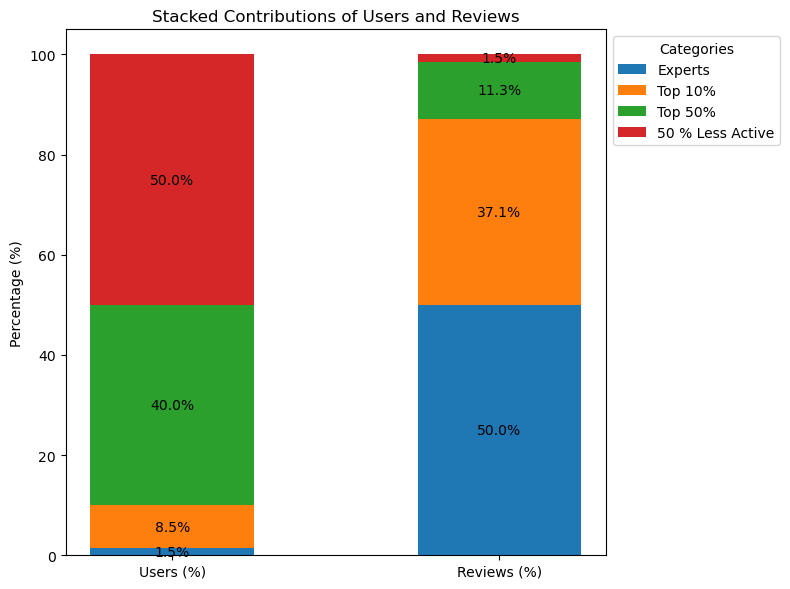

In [19]:
categories = ['Experts', 'Top 10%', 'Top 50%', '50 % Less Active']
bars = ['Users (%)', 'Reviews (%)']
pourcentage_users = [user_proportion_experts, user_proportion_10, user_proportion_50, user_proportion_less_active]
pourcentage_reviews = [review_proportion_experts, review_proportion_10, review_proportion_50, review_proportion_less_active]
data = np.array([pourcentage_users, pourcentage_reviews])

fig, ax = plt.subplots(figsize=(8, 6))

bar_width = 0.5
x = np.arange(2)  # Two bars: Users (%) and Reviews (%)

# Plot each category as a stack
bottom_values = np.zeros(2)  # Starting point for stacking
for i, category in enumerate(categories):
    bars_plot = ax.bar(bars, data[:, i], bottom=bottom_values, label=category, width=bar_width)
    
    # Add annotations for each bar segment
    for bar in bars_plot:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, 
                bar.get_y() + height / 2, 
                f'{height:.1f}%', 
                ha='center', va='center', fontsize=10, color='black')
    
    bottom_values += data[:, i]

ax.set_ylabel('Percentage (%)')
ax.set_title('Stacked Contributions of Users and Reviews')
ax.legend(title="Categories", loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()